In [1]:
install.packages("maps")

package 'maps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\yamph\AppData\Local\Temp\Rtmpo3USm3\downloaded_packages


In [2]:
install.packages("caret")

also installing the dependencies 'listenv', 'parallelly', 'future', 'globals', 'shape', 'future.apply', 'progressr', 'SQUAREM', 'diagram', 'lava', 'prodlim', 'proxy', 'clock', 'gower', 'hardhat', 'ipred', 'timeDate', 'e1071', 'ModelMetrics', 'pROC', 'recipes'




package 'listenv' successfully unpacked and MD5 sums checked
package 'parallelly' successfully unpacked and MD5 sums checked
package 'future' successfully unpacked and MD5 sums checked
package 'globals' successfully unpacked and MD5 sums checked
package 'shape' successfully unpacked and MD5 sums checked
package 'future.apply' successfully unpacked and MD5 sums checked
package 'progressr' successfully unpacked and MD5 sums checked
package 'SQUAREM' successfully unpacked and MD5 sums checked
package 'diagram' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'prodlim' successfully unpacked and MD5 sums checked
package 'proxy' successfully unpacked and MD5 sums checked
package 'clock' successfully unpacked and MD5 sums checked
package 'gower' successfully unpacked and MD5 sums checked
package 'hardhat' successfully unpacked and MD5 sums checked
package 'ipred' successfully unpacked and MD5 sums checked
package 'timeDate' successfu

In [3]:
# Importing necessary libraries
library("tidyverse")
library("ggplot2")
library("ggrepel")
library("ggcorrplot")
library("DT")
library(dplyr)
library(tidyr)
library(stringr)
library(maps)
library(caret)
library(rpart)

Warning message:
"package 'tidyverse' was built under R version 4.4.2"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'ggcorrplot' was built under R version 4.4.2"
Warning message:
"package 'maps' was built under R version 4.4.2"

Attaching package: 'maps'


The following object is masked from 'package:purrr':

    map


Warning message:
"package 'caret' was built under R version 4.4.2"
Loading required package: l

# Data Preparation

## Global Mobility Dataset

In [4]:
# Retrieve "COVID-19_global_mobility.csv" file
dataset_global_mobility <- read.csv("https://www.dropbox.com/scl/fi/x4i3ah1gmt4kryrrq0c8m/Global_Mobility_Report.csv?rlkey=tt4i5q1zss7e8ly2zmn8xvhc2&st=xnxrxz2d&dl=1")

In [5]:
# Convert the date column from character to Date format
dataset_global_mobility <- dataset_global_mobility %>%
  mutate(date = as.Date(date, format = "%Y-%m-%d"))

# Filter the dataset to include only rows with the date "2021-01-19"
dataset_global_mobility_updated <- dataset_global_mobility %>%
  filter(date == as.Date("2021-01-19"))

In [6]:
summary(dataset_global_mobility_updated$date)

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2021-01-19" "2021-01-19" "2021-01-19" "2021-01-19" "2021-01-19" "2021-01-19"

Only the observations from 1/19/2021 are in the global datset now.

In [7]:
# count of observations in the updated global mobility dataset
nrow(dataset_global_mobility_updated)

[1] 13122

In [8]:
# Filter the dataset to include only rows where sub_region_2 is "Texas"
dataset_global_mobility_updated <- dataset_global_mobility_updated %>%
  filter(sub_region_1 == "Texas")

In [9]:
length(unique(dataset_global_mobility_updated$sub_region_2))

[1] 205

In [10]:
# remove the rows with missing value in the county_name column
dataset_global_mobility_updated <- dataset_global_mobility_updated %>%
  filter(!is.na(sub_region_2))

In [11]:
# Remove the first row using slice
dataset_global_mobility_updated <- dataset_global_mobility_updated %>%
  slice(-1)

In [12]:
length(unique(dataset_global_mobility_updated$sub_region_2))

[1] 204

In [13]:
write.csv(dataset_global_mobility_updated, "dataset_global_mobility_updated.csv", row.names = FALSE )

## COVID-19 Plus Census Dataset

In [14]:
# Retrieve "COVID-19_cases_plus_census.csv" file
dataset_plus_census <- read.csv("https://raw.githubusercontent.com/yamphurai/Project2_ClusterAnalysis/refs/heads/main/updated_COVID-19_cases_plus_census.csv")

In [15]:
#filter the dataset by Texas
dataset_plus_census <- dataset_plus_census %>% filter(state == "TX")

In [16]:
length(unique(dataset_plus_census$county_name))

[1] 254

In [18]:
# Extract unique names from both columns
sub_region_2_names <- unique(dataset_global_mobility_updated$sub_region_2)
county_names <- unique(dataset_plus_census$county_name)

# Find names that are in county_names but not in sub_region_2_names
missing_in_sub_region_2 <- setdiff(county_names, sub_region_2_names)

# Display the missing names
print(missing_in_sub_region_2)
length(unique(missing_in_sub_region_2))

 [1] "Hansford County"      "Stonewall County"     "Cochran County"      
 [4] "Crockett County"      "King County"          "Briscoe County"      
 [7] "Cottle County"        "Sutton County"        "Menard County"       
[10] "Jim Hogg County"      "Loving County"        "Edwards County"      
[13] "Kinney County"        "Armstrong County"     "Foard County"        
[16] "Irion County"         "Glasscock County"     "Baylor County"       
[19] "Sterling County"      "Dickens County"       "Mills County"        
[22] "Collingsworth County" "Schleicher County"    "Throckmorton County" 
[25] "Shackelford County"   "Knox County"          "Wheeler County"      
[28] "Upton County"         "Hemphill County"      "Floyd County"        
[31] "Donley County"        "Fisher County"        "Lipscomb County"     
[34] "Delta County"         "Concho County"        "Garza County"        
[37] "Hudspeth County"      "Real County"          "San Saba County"     
[40] "Kenedy County"        "Hartley C

[1] 50

In [19]:
# Remove the rows from dataset_plus_census where county_name is in names_to_remove
dataset_plus_census <- dataset_plus_census %>%
  filter(!county_name %in% missing_in_sub_region_2)

In [20]:
# remove the rows with missing value in the county_name column
dataset_plus_census <- dataset_plus_census %>%
  filter(!is.na(county_name))

In [21]:
length(unique(dataset_plus_census$county_name))

[1] 204

In [22]:
write.csv(dataset_plus_census, "dataset_plus_census.csv", row.names = FALSE )

Finally the two datasets are ready to be merged.

## Final Dataset

In [23]:
# Sort dataset_plus_census by county_name in ascending order
dataset_plus_census_sorted <- dataset_plus_census %>%
  arrange(county_name)

# Sort dataset_global_mobility_updated by sub_region_2 in ascending order
dataset_global_mobility_updated_sorted <- dataset_global_mobility_updated %>%
  arrange(sub_region_2)

# Merge the datasets column-wise
dataset <- cbind(dataset_plus_census_sorted, dataset_global_mobility_updated_sorted)


In [24]:
head(dataset, 10)

,state,state_fips_code,county_name,confirmed_cases,deaths,total_pop,male_pop,female_pop,white_pop,black_pop,⋯,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<int>,<date>,<int>,<int>,<int>,<int>,<int>,<int>
1,TX,48,Anderson County,5575,75,57747,35292,22455,34468,12075,⋯,,,48001,2021-01-19,-15,-17,NA,NA,-18,6
2,TX,48,Andrews County,1606,37,17577,8980,8597,7229,265,⋯,,,48003,2021-01-19,-28,NA,NA,14,-25,NA
3,TX,48,Angelina County,6765,193,87700,42707,44993,53704,12878,⋯,,,48005,2021-01-19,-13,-9,NA,-6,-20,8
4,TX,48,Aransas County,895,26,24832,12448,12384,16803,390,⋯,,,48007,2021-01-19,-16,1,-23,NA,-21,6
5,TX,48,Archer County,694,10,8793,4335,4458,7787,74,⋯,,,48009,2021-01-19,NA,NA,NA,NA,-17,NA
6,TX,48,Atascosa County,3781,90,48139,24051,24088,16480,353,⋯,,,48013,2021-01-19,-13,-13,NA,NA,-26,11
7,TX,48,Austin County,1404,18,29292,14474,14818,18533,2601,⋯,,,48015,2021-01-19,-10,-1,NA,NA,-18,7
8,TX,48,Bailey County,742,15,7098,3678,3420,2459,108,⋯,,,48017,2021-01-19,NA,NA,NA,NA,-22,NA
9,TX,48,Bandera County,820,20,21316,10570,10746,16788,213,⋯,,,48019,2021-01-19,NA,NA,NA,NA,-24,11


In [26]:
# Check for missing values in each column
missing_values <- colSums(is.na(dataset))

# Print the names of columns that have missing values
columns_with_missing_values <- names(missing_values[missing_values > 0])

# Print the names of columns with missing values
print("Columns with missing values:")
print(columns_with_missing_values)

[1] "Columns with missing values:"
[1] "retail_and_recreation_percent_change_from_baseline"
[2] "grocery_and_pharmacy_percent_change_from_baseline" 
[3] "parks_percent_change_from_baseline"                
[4] "transit_stations_percent_change_from_baseline"     
[5] "workplaces_percent_change_from_baseline"           
[6] "residential_percent_change_from_baseline"          


In [27]:
print("Total number of observations: ")
print(nrow(dataset))

#Count of missing values in these columns
sum(is.na(dataset["retail_and_recreation_percent_change_from_baseline"]))
sum(is.na(dataset["grocery_and_pharmacy_percent_change_from_baseline"]))
sum(is.na(dataset["parks_percent_change_from_baseline"]))
sum(is.na(dataset["transit_stations_percent_change_from_baseline"]))
sum(is.na(dataset["workplaces_percent_change_from_baseline"]))
sum(is.na(dataset["residential_percent_change_from_baseline"]))

[1] "Total number of observations: "
[1] 204


[1] 91

[1] 104

[1] 155

[1] 114

[1] 9

[1] 93

Since most of these feature columns have too many missing values, we will be replacing them with the average value from their corresponding column.

In [28]:
# Replace the missing values with mean values
mean_value_retail <- mean(dataset$retail_and_recreation_percent_change_from_baseline, na.rm = TRUE)
dataset$retail_and_recreation_percent_change_from_baseline[is.na(dataset$retail_and_recreation_percent_change_from_baseline)] <- mean_value_retail

mean_value_grocery_pharmacy <- mean(dataset$grocery_and_pharmacy_percent_change_from_baseline, na.rm = TRUE)
dataset$grocery_and_pharmacy_percent_change_from_baseline[is.na(dataset$grocery_and_pharmacy_percent_change_from_baseline)] <- mean_value_grocery_pharmacy

mean_value_parks <- mean(dataset$parks_percent_change_from_baseline, na.rm = TRUE)
dataset$parks_percent_change_from_baseline[is.na(dataset$parks_percent_change_from_baseline)] <- mean_value_parks

mean_value_transit_stations <- mean(dataset$transit_stations_percent_change_from_baseline, na.rm = TRUE)
dataset$transit_stations_percent_change_from_baseline[is.na(dataset$transit_stations_percent_change_from_baseline)] <- mean_value_transit_stations

mean_value_workplaces <- mean(dataset$workplaces_percent_change_from_baseline, na.rm = TRUE)
dataset$workplaces_percent_change_from_baseline[is.na(dataset$workplaces_percent_change_from_baseline)] <- mean_value_workplaces

mean_value_residential <- mean(dataset$residential_percent_change_from_baseline, na.rm = TRUE)
dataset$residential_percent_change_from_baseline[is.na(dataset$residential_percent_change_from_baseline)] <- mean_value_residential

In [29]:
#Check for the missing values in the updated coloumns
sum(is.na(dataset["retail_and_recreation_percent_change_from_baseline"]))
sum(is.na(dataset["grocery_and_pharmacy_percent_change_from_baseline"]))
sum(is.na(dataset["parks_percent_change_from_baseline"]))
sum(is.na(dataset["transit_stations_percent_change_from_baseline"]))
sum(is.na(dataset["workplaces_percent_change_from_baseline"]))
sum(is.na(dataset["residential_percent_change_from_baseline"]))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [30]:
# Drop the specified columns
dataset <- dataset %>% select(-state, -state_fips_code, -country_region_code, -country_region, -sub_region_1, -sub_region_2, -metro_area, 
                              -iso_3166_2_code, -census_fips_code, -date)

In [31]:
summary(dataset)

 county_name        confirmed_cases        deaths         total_pop      
 Length:204         Min.   :    70.0   Min.   :   2.0   Min.   :    600  
 Class :character   1st Qu.:   941.5   1st Qu.:  21.0   1st Qu.:  12635  
 Mode  :character   Median :  1889.5   Median :  45.5   Median :  24898  
                    Mean   : 10424.4   Mean   : 157.0   Mean   : 133668  
                    3rd Qu.:  5066.5   3rd Qu.: 103.8   3rd Qu.:  66671  
                    Max.   :286356.0   Max.   :3825.0   Max.   :4525519  
    male_pop         female_pop        white_pop         black_pop       
 Min.   :    321   Min.   :    279   Min.   :    292   Min.   :     0.0  
 1st Qu.:   6365   1st Qu.:   5955   1st Qu.:   6792   1st Qu.:   269.5  
 Median :  12552   Median :  12336   Median :  14862   Median :  1375.5  
 Mean   :  66364   Mean   :  67304   Mean   :  57194   Mean   : 15664.0  
 3rd Qu.:  34017   3rd Qu.:  33479   3rd Qu.:  41819   3rd Qu.:  5501.2  
 Max.   :2251060   Max.   :2274459   M

In [32]:
write.csv(dataset, "datset_summary.csv", row.names = FALSE)

In [33]:
# Save the dataset
write.csv(dataset, "dataset.csv", row.names = FALSE )

## Pick features & evaluate correlations

In [34]:
dataset <- read.csv("dataset.csv")

In [35]:
# Make character factors for analysis
dataset <- dataset %>% mutate_if(is.character, factor)

# Calculate rates (per 10,000 people)
dataset <- dataset %>% filter(confirmed_cases > 0) 
dataset <- dataset %>% mutate(
  cases_per_10000 = confirmed_cases/total_pop*10000, 
  deaths_per_10000 = deaths/total_pop*10000, 
  death_per_case = deaths/confirmed_cases)

In [36]:
# Check for the added columns
names(dataset)

[1] "county_name"                                       
 [2] "confirmed_cases"                                   
 [3] "deaths"                                            
 [4] "total_pop"                                         
 [5] "male_pop"                                          
 [6] "female_pop"                                        
 [7] "white_pop"                                         
 [8] "black_pop"                                         
 [9] "asian_pop"                                         
[10] "hispanic_pop"                                      
[11] "amerindian_pop"                                    
[12] "other_race_pop"                                    
[13] "median_income"                                     
[14] "income_less_50K"                                   
[15] "income_50K_100K"                                   
[16] "income_100K_150K"                                  
[17] "income_150K_more"                                  
[18] "rent_under_50_percent"                             
[19] "rent_over_50_percent"                              
[20] "median_age"                                        
[21] "male_0_20"                                         
[22] "male_21_49"                                        
[23] "male_50_above"                                     
[24] "female_0_20"                                       
[25] "female_21_49"                                      
[26] "female_50_above"                                   
[27] "unemployed_pop"                                    
[28] "employed_pop"                                      
[29] "commute"                                           
[30] "worked_at_home"                                    
[31] "walked_to_work"                                    
[32] "retail_and_recreation_percent_change_from_baseline"
[33] "grocery_and_pharmacy_percent_change_from_baseline" 
[34] "parks_percent_change_from_baseline"                
[35] "transit_stations_percent_change_from_baseline"     
[36] "workplaces_percent_change_from_baseline"           
[37] "residential_percent_change_from_baseline"          
[38] "cases_per_10000"                                   
[39] "deaths_per_10000"                                  
[40] "death_per_case"

In [37]:
# Select the features for the dataset
dataset_select <-  dataset %>% select(county_name, total_pop, hispanic_pop, black_pop, male_50_above, female_50_above,
                                      income_50K_100K, rent_over_50_percent, commute, worked_at_home, transit_stations_percent_change_from_baseline, 
                                      workplaces_percent_change_from_baseline, 
                                      cases_per_10000, deaths_per_10000, death_per_case)

In [38]:
# Normalize by population
dataset_select <- dataset_select %>% mutate(
  hispanic_pop = hispanic_pop / total_pop, 
  black_pop = black_pop / total_pop,
  male_50_above = male_50_above / total_pop, 
  female_50_above = female_50_above / total_pop, 
  income_50K_100K = income_50K_100K / total_pop, 
  rent_over_50_percent = rent_over_50_percent / total_pop, 
  commute = commute / total_pop,
  worked_at_home = worked_at_home/ total_pop, 
  )

In [39]:
summary(dataset_select)

          county_name    total_pop        hispanic_pop       black_pop      
 Anderson County:  1   Min.   :    600   Min.   :0.03454   Min.   :0.00000  
 Andrews County :  1   1st Qu.:  12635   1st Qu.:0.17705   1st Qu.:0.01504  
 Angelina County:  1   Median :  24898   Median :0.25266   Median :0.05254  
 Aransas County :  1   Mean   : 133668   Mean   :0.34352   Mean   :0.07161  
 Archer County  :  1   3rd Qu.:  66671   3rd Qu.:0.48529   3rd Qu.:0.10209  
 Atascosa County:  1   Max.   :4525519   Max.   :0.99185   Max.   :0.33743  
 (Other)        :198                                                        
 male_50_above    female_50_above  income_50K_100K   rent_over_50_percent
 Min.   :0.1067   Min.   :0.1192   Min.   :0.04964   Min.   :0.00000     
 1st Qu.:0.1564   1st Qu.:0.1698   1st Qu.:0.09331   1st Qu.:0.01207     
 Median :0.1857   Median :0.1949   Median :0.10466   Median :0.01587     
 Mean   :0.1854   Mean   :0.2004   Mean   :0.10275   Mean   :0.01745     
 3rd Qu.:0.211

In [40]:
# Check for correlation
library(seriation)

cm <- cor(dataset_select %>% select_if(is.numeric) %>% na.omit)


Attaching package: 'seriation'


The following object is masked from 'package:lattice':

    panel.lines




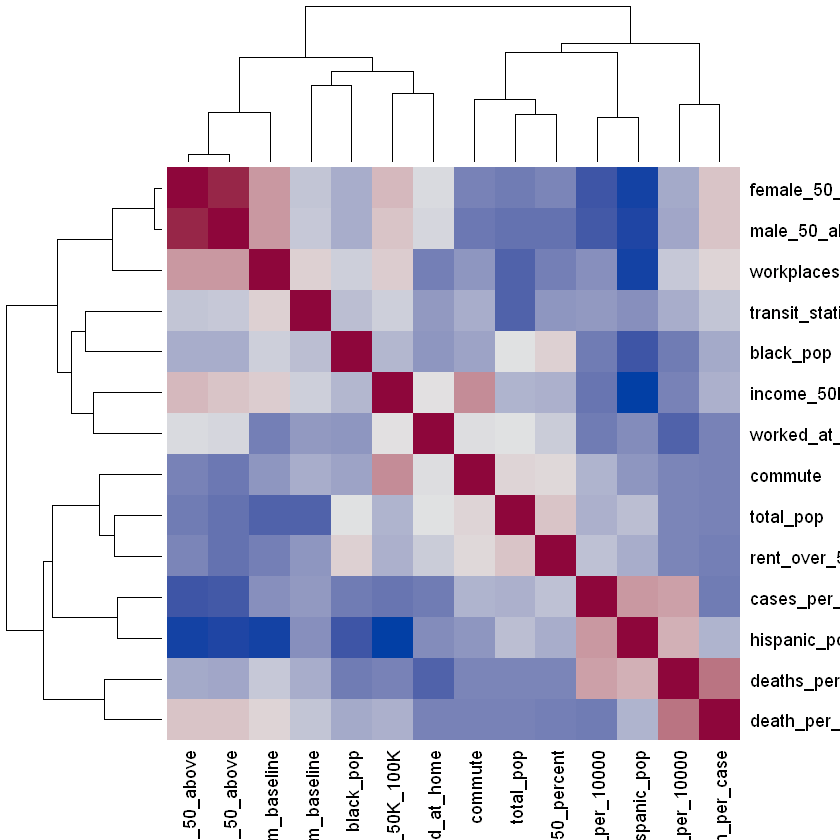

In [41]:
hmap(cm, margins = c(5,5))

## Create Class Variable

In [42]:
# Label "high" for the counties with deaths per 10000 that is greater than 16
dataset_select <- dataset_select %>% mutate(high = as.factor(deaths_per_10000 > 16))

# Check for class imbalance
dataset_select %>% pull(high) %>% table()

.
FALSE  TRUE 
  100   104 

With threshold of 16, the dataset is close to perfectly balanced.

In [43]:
# Group the counties by category in descending order
dataset_select %>% group_by(county_name) %>% 
  summarize(high_pct = sum(high == TRUE)/n()) %>%
  arrange(desc(high_pct))

county_name,high_pct
<fct>,<dbl>
Andrews County,1
Angelina County,1
Atascosa County,1
Bailey County,1
Bee County,1
Brooks County,1
Brown County,1
Callahan County,1
Cameron County,1


# Test & Train split

In [44]:
# Convert the 'county_names' column to lower case and remove "county"
dataset_select <- dataset_select %>%
  mutate(county_name = str_replace_all(tolower(county_name), " county", ""))

In [45]:
# Pick the DFW + rural (from project 2) + random counties to train
dataset_train <- dataset_select %>% filter(county_name %in% c("collin", "dallas", "denton", "ellis", "johnson", "kaufman", "parker", "rockwall", "tarrant", "wise",
                                                             "bell", "cameron", "el paso", "hidalgo", "nueces", "terry", "martin", "lubbock", "wichita", "cherokee",
                                                             "hale", "maverick", "parmer"))

In [46]:
dataset_train %>% pull(high) %>% table()

.
FALSE  TRUE 
   12    11 

Trainig dataset is balanced.

In [47]:
# Testing dataset (remaining counties)
dataset_test <-  dataset_select %>% filter(!(county_name %in% c("collin", "dallas", "denton", "ellis", "johnson", "kaufman", "parker", "rockwall", "tarrant", "wise",
                                                             "bell", "cameron", "el paso", "hidalgo", "nueces", "terry", "martin", "lubbock", "wichita", "cherokee",
                                                             "hale", "maverick", "parmer")))
dataset_test %>% pull(high) %>% table()

.
FALSE  TRUE 
   88    93 

Balanced testing dataset

# Visualization of counties with high deaths per 10000

In [97]:
# Load county map data and convert to tibble
counties <- as_tibble(map_data("county"))

# Filter for Texas counties
texas_counties <- counties %>% filter(region == "texas")

# Rename the columns and select only the relevant columns
texas_counties <- texas_counties %>%
  rename(county = subregion) %>%
  select(county, long, lat, group)

# Add variables to the map data
texas_counties_all <- texas_counties %>% left_join(dataset_select %>% 
    mutate(county = county_name %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

#checking the merged dataset
names(texas_counties_all)

Joining with `by = join_by(county)`


[1] "county"                                       
 [2] "long"                                         
 [3] "lat"                                          
 [4] "group"                                        
 [5] "county_name"                                  
 [6] "total_pop"                                    
 [7] "hispanic_pop"                                 
 [8] "black_pop"                                    
 [9] "male_50_above"                                
[10] "female_50_above"                              
[11] "income_50K_100K"                              
[12] "rent_over_50_percent"                         
[13] "commute"                                      
[14] "worked_at_home"                               
[15] "transit_stations_percent_change_from_baseline"
[16] "workplaces_percent_change_from_baseline"      
[17] "cases_per_10000"                              
[18] "deaths_per_10000"                             
[19] "death_per_case"                               
[20] "high"

  [1] "andrews"       "angelina"      "atascosa"      "bailey"       
  [5] "bee"           "brooks"        "brown"         "callahan"     
  [9] "cameron"       "camp"          "carson"        "cass"         
 [13] "castro"        "cherokee"      "childress"     "coleman"      
 [17] "comanche"      "crane"         "crosby"        "culberson"    
 [21] "dallam"        "dawson"        "dewitt"        "deaf smith"   
 [25] "duval"         "ector"         "el paso"       "fannin"       
 [29] "fayette"       "gaines"        "gray"          "grayson"      
 [33] "gregg"         "grimes"        "hale"          "hall"         
 [37] "hamilton"      "hardeman"      "hidalgo"       "hockley"      
 [41] "hopkins"       "howard"        "hutchinson"    "jim wells"    
 [45] "jones"         "karnes"        "kleberg"       "la salle"     
 [49] "lamar"         "lamb"          "lavaca"        "lee"          
 [53] "leon"          "lubbock"       "lynn"          "marion"       
 [57] "martin"      

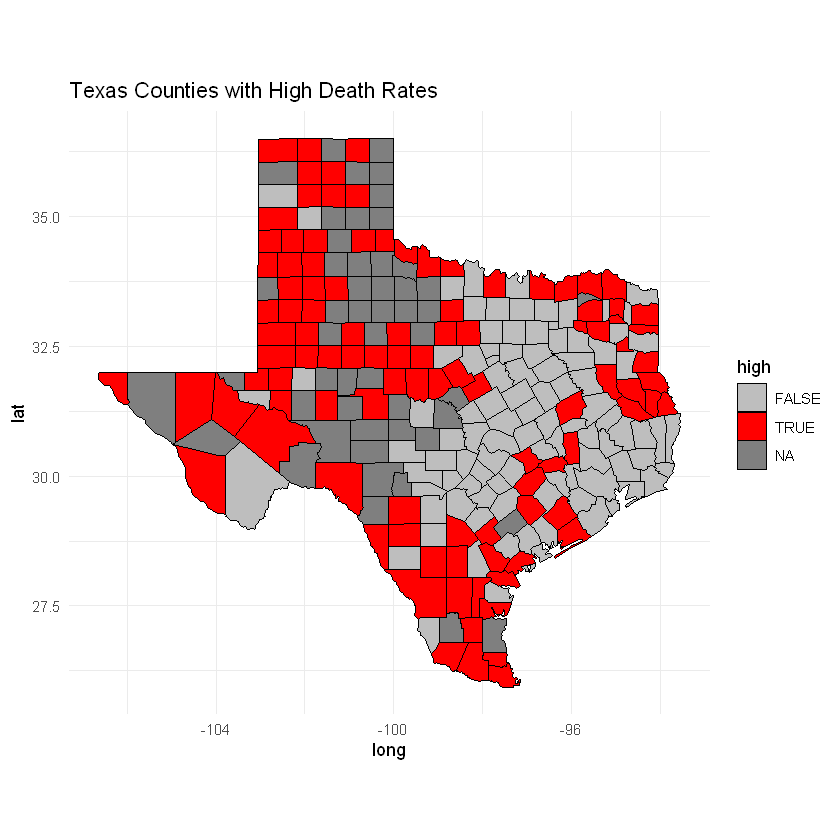

In [98]:
ggplot(texas_counties_all, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high), color = "black", linewidth = 0.1) + 
    coord_quickmap() + scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey')) +
    ggtitle("Texas Counties with High Death Rates") + theme_minimal()

# Filter the dataset for counties with high deaths_per_10000
high_counties <- dataset_select %>% filter(high == TRUE)

# Check: # Print the county names and count
print(high_counties$county_name)
print(length(unique(high_counties$county_name)))

Overview of the 104 counties with high deaths per 10,000 > 16.

# Random Forest Classifier

In [99]:
names(dataset_train_for_model)

[1] "total_pop"                                    
 [2] "hispanic_pop"                                 
 [3] "black_pop"                                    
 [4] "male_50_above"                                
 [5] "female_50_above"                              
 [6] "income_50K_100K"                              
 [7] "rent_over_50_percent"                         
 [8] "commute"                                      
 [9] "worked_at_home"                               
[10] "transit_stations_percent_change_from_baseline"
[11] "workplaces_percent_change_from_baseline"      
[12] "cases_per_10000"                              
[13] "deaths_per_10000"                             
[14] "death_per_case"                               
[15] "high"

In [100]:
# Remove irrelevant columns for both training and testing datasets
dataset_train_for_model <- dataset_train %>% select(-county_name, -cases_per_10000, -deaths_per_10000, -death_per_case)
dataset_test_for_model <- dataset_test %>% select(-county_name)

In [101]:
# Check for null values in train and test datasets
sum(is.na(dataset_train_for_model))
sum(is.na(dataset_test_for_model))

[1] 0

[1] 0

In [102]:
# ensure to not have "county_name" column in training set before building the model
names(dataset_train_for_model)

[1] "total_pop"                                    
 [2] "hispanic_pop"                                 
 [3] "black_pop"                                    
 [4] "male_50_above"                                
 [5] "female_50_above"                              
 [6] "income_50K_100K"                              
 [7] "rent_over_50_percent"                         
 [8] "commute"                                      
 [9] "worked_at_home"                               
[10] "transit_stations_percent_change_from_baseline"
[11] "workplaces_percent_change_from_baseline"      
[12] "high"

In [60]:
install.packages("randomForest")

package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\yamph\AppData\Local\Temp\Rtmpo3USm3\downloaded_packages


In [103]:
# excluding counties as they are not useful to compare variables
random_forest_classifier <- dataset_train_for_model %>%
  train(high ~ .,
        data = .,
        method = "rf",
        trControl = trainControl(method = "cv", number = 10)
  )
random_forest_classifier

Random Forest 

23 samples
11 predictors
 2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 21, 21, 21, 21, 21, 20, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa
   2    0.8500000  0.70 
   6    0.7500000  0.50 
  11    0.6666667  0.34 

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

The cross-validation results show that for all tested values of mtry (2, 6, and 11). 
The optimal value selected for the final model was mtry = 2, meaning that at each split, the algorithm will randomly select 2 features to consider for the best split.


In [104]:
# Ranking of the features for predictions in the model
varImp(random_forest_classifier)

rf variable importance

                                              Overall
commute                                       100.000
worked_at_home                                 82.539
income_50K_100K                                66.843
hispanic_pop                                   61.540
total_pop                                      34.546
workplaces_percent_change_from_baseline        30.192
black_pop                                      22.730
transit_stations_percent_change_from_baseline  18.681
rent_over_50_percent                           13.345
female_50_above                                 3.726
male_50_above                                   0.000

Using this classifier, the "commute" feature has the highest importance. This means it contributes the most to the model's predictive power. In this case, the model relies heavily on the this variable to make predictions. The feature "male_50_above" does not have any importance for the prediction

## Accuracy & Evaluation

In [105]:
# Use the model to predict on the test dataset. Add predicted values to column "high_predicted_RFC". Testing dataset needs "county_name" for heat map.
dataset_test$high_predicted_RFC <- predict(random_forest_classifier, dataset_test)

In [106]:
# Check for new "high_predicted_RFC" column
names(dataset_test)

[1] "county_name"                                  
 [2] "total_pop"                                    
 [3] "hispanic_pop"                                 
 [4] "black_pop"                                    
 [5] "male_50_above"                                
 [6] "female_50_above"                              
 [7] "income_50K_100K"                              
 [8] "rent_over_50_percent"                         
 [9] "commute"                                      
[10] "worked_at_home"                               
[11] "transit_stations_percent_change_from_baseline"
[12] "workplaces_percent_change_from_baseline"      
[13] "cases_per_10000"                              
[14] "deaths_per_10000"                             
[15] "death_per_case"                               
[16] "high"                                         
[17] "high_predicted_RFC"                           
[18] "high_predicted_knn"                           
[19] "high_predicted_xgboost"                       
[20] "high_predicted_xgboost_svm"                   
[21] "high_predicted_nnet"

In [107]:
# Visualize the prediction results
counties_test <- texas_counties %>% left_join(dataset_test %>% 
    mutate(county = county_name %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

Joining with `by = join_by(county)`


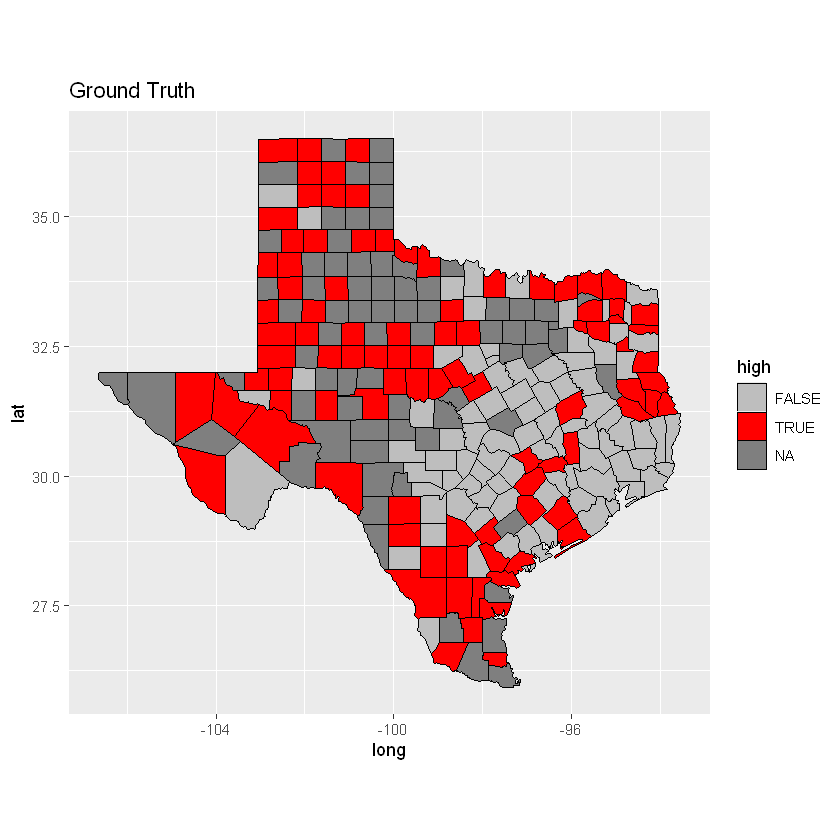

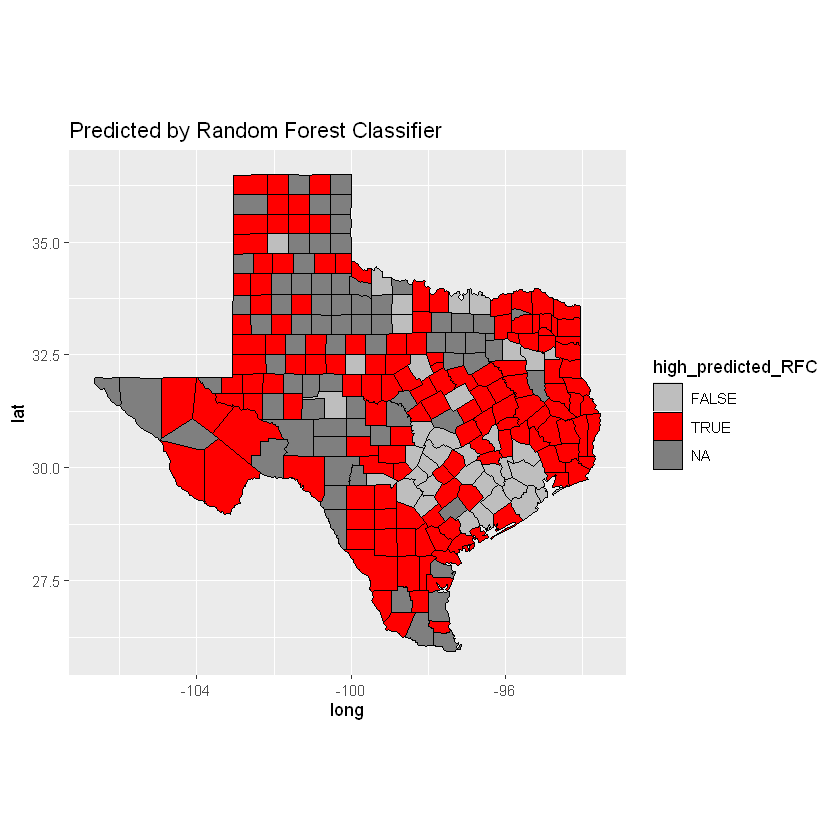

In [139]:
# Ground truth
ground_truth <- ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high), color = "black", size = 0.1) + 
  coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey')) +
  ggtitle("Ground Truth")

# Predictions
predict_RFC <- ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high_predicted_RFC), color = "black", linewidth = 0.1) + 
  coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey')) + 
  ggtitle("Predicted by Random Forest Classifier")

ground_truth
predict_RFC

In [140]:
# Save the plots
ggsave("ground_truth.png", plot = ground_truth, width = 10, height = 10)
ggsave("predict_RFC.png", plot = predict_RFC, width = 10, height = 10)

Just by visually looking at these two heat maps, we can see that the model predictions on the deaths per 10000 for the counties are very similar to the ground truth. This indicates a high model performance.

In [109]:
# Confusion Matrix
confusionMatrix(data = dataset_test$high_predicted_RFC, ref = dataset_test$high)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE    28    9
     TRUE     60   84
                                          
               Accuracy : 0.6188          
                 95% CI : (0.5438, 0.6898)
    No Information Rate : 0.5138          
    P-Value [Acc > NIR] : 0.002852        
                                          
                  Kappa : 0.2249          
                                          
 Mcnemar's Test P-Value : 1.752e-09       
                                          
            Sensitivity : 0.3182          
            Specificity : 0.9032          
         Pos Pred Value : 0.7568          
         Neg Pred Value : 0.5833          
             Prevalence : 0.4862          
         Detection Rate : 0.1547          
   Detection Prevalence : 0.2044          
      Balanced Accuracy : 0.6107          
                                          
       'Positive' Class : FALSE           
                     

# K-Nearest Neighbor Classifier

In [110]:
# K-nearest neighbor classifier (k values: 1, 3, 5, 7, 9), training method as 10 folds cross validation
knn_classifier <- dataset_train_for_model %>% 
    train(high ~ .,
          method = "knn",
          data = .,
          preProcess = "scale",
          tuneGrid = data.frame(k = c(1, 3, 5, 7, 9)),
          trControl = trainControl(method = "cv", number=10))

knn_classifier

k-Nearest Neighbors 

23 samples
11 predictors
 2 classes: 'FALSE', 'TRUE' 

Pre-processing: scaled (11) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 21, 21, 21, 21, 21, 21, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa
  1  0.8833333  0.74 
  3  0.8666667  0.70 
  5  0.8333333  0.64 
  7  0.7000000  0.34 
  9  0.6666667  0.29 

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.

In [111]:
# Ranking of the features for predictions in the model
varImp(knn_classifier)

ROC curve variable importance

                                              Importance
commute                                           100.00
worked_at_home                                     97.96
income_50K_100K                                    89.80
hispanic_pop                                       85.71
black_pop                                          55.10
total_pop                                          53.06
workplaces_percent_change_from_baseline            32.65
transit_stations_percent_change_from_baseline      16.33
female_50_above                                    10.20
male_50_above                                      10.20
rent_over_50_percent                                0.00

## Accuracy & Evaluation

In [112]:
 # Use the model to predict on the test dataset. Add predicted values to column "high_predicted_knn"
dataset_test$high_predicted_knn <- predict(knn_classifier, dataset_test_for_model)

In [113]:
#Check if the column was added
names(dataset_test)

[1] "county_name"                                  
 [2] "total_pop"                                    
 [3] "hispanic_pop"                                 
 [4] "black_pop"                                    
 [5] "male_50_above"                                
 [6] "female_50_above"                              
 [7] "income_50K_100K"                              
 [8] "rent_over_50_percent"                         
 [9] "commute"                                      
[10] "worked_at_home"                               
[11] "transit_stations_percent_change_from_baseline"
[12] "workplaces_percent_change_from_baseline"      
[13] "cases_per_10000"                              
[14] "deaths_per_10000"                             
[15] "death_per_case"                               
[16] "high"                                         
[17] "high_predicted_RFC"                           
[18] "high_predicted_knn"                           
[19] "high_predicted_xgboost"                       
[20] "high_predicted_xgboost_svm"                   
[21] "high_predicted_nnet"

Joining with `by = join_by(county)`


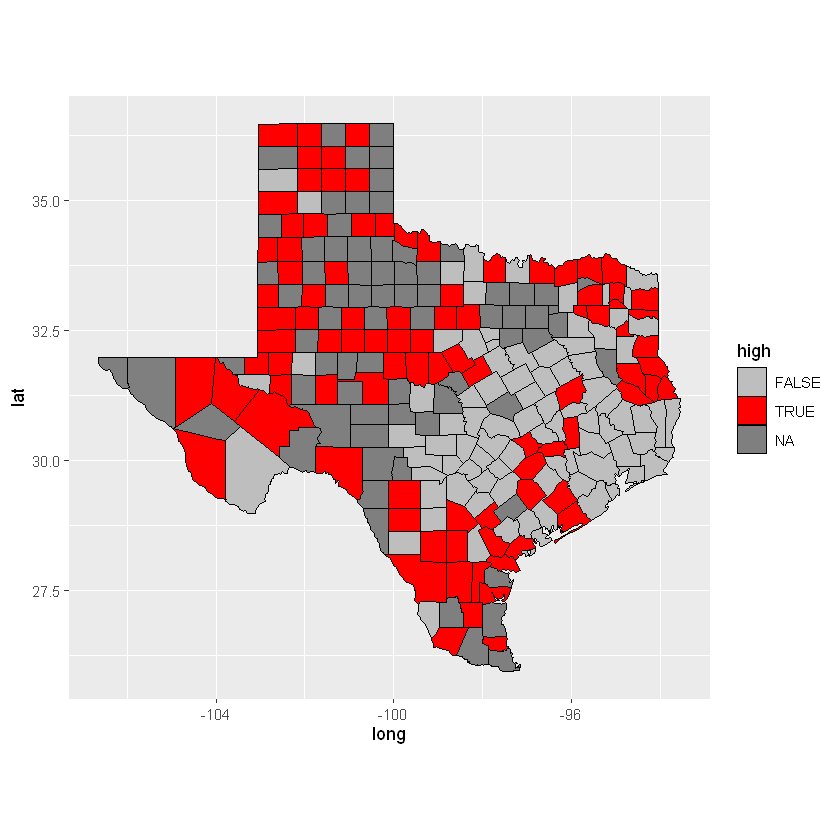

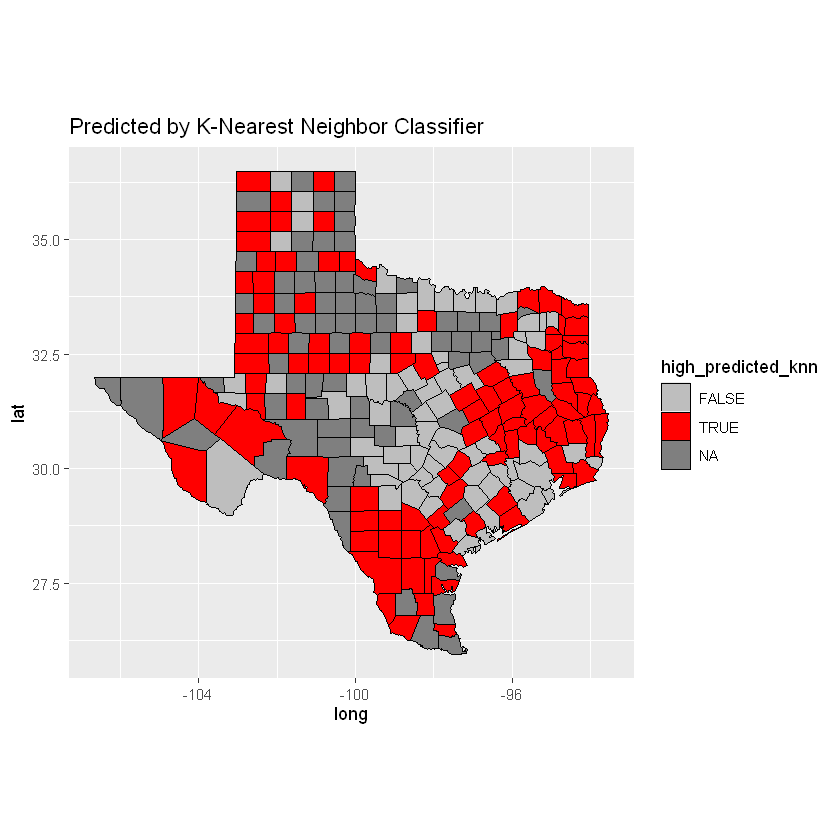

In [145]:
# Visualize the prediction results
counties_test <- texas_counties %>% left_join(dataset_test %>% 
    mutate(county = county_name %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

# Ground truth
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high), color = "black", size = 0.1) + 
  coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

# Predictions
predict_knn <- ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high_predicted_knn), color = "black", size = 0.1) + 
    coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))+
  ggtitle("Predicted by K-Nearest Neighbor Classifier")

predict_knn

Less accurate than previous model.

In [146]:
# Save the plot
ggsave("predict_knn.png", plot = predict_knn, width = 10, height = 10)

In [115]:
# Confusion Matrix
confusionMatrix(data = dataset_test$high_predicted_knn, ref = dataset_test$high)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE    48   25
     TRUE     40   68
                                          
               Accuracy : 0.6409          
                 95% CI : (0.5664, 0.7107)
    No Information Rate : 0.5138          
    P-Value [Acc > NIR] : 0.0003766       
                                          
                  Kappa : 0.2779          
                                          
 Mcnemar's Test P-Value : 0.0824779       
                                          
            Sensitivity : 0.5455          
            Specificity : 0.7312          
         Pos Pred Value : 0.6575          
         Neg Pred Value : 0.6296          
             Prevalence : 0.4862          
         Detection Rate : 0.2652          
   Detection Prevalence : 0.4033          
      Balanced Accuracy : 0.6383          
                                          
       'Positive' Class : FALSE           
                     

# Gradient Boosted Decision Trees (xgboost)

In [116]:
install.packages("xgboost")

Warning message:
"package 'xgboost' is in use and will not be installed"


In [77]:
library(xgboost)

Warning message:
"package 'xgboost' was built under R version 4.4.2"

Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice




In [117]:
# Using 5 tuning parameter combinations, 10 folds CV, and some tuning grid for hyperparameters tuning
xgboost_classifier <- dataset_train_for_model %>%
  train(high ~ .,
        method = "xgbTree",
        data = .,
        tuneLength = 5,
        trControl = trainControl(method = "cv"),
        tuneGrid = expand.grid(
          nrounds = 20,
          max_depth = 3,
          colsample_bytree = .6,
          eta = 0.1,
          gamma = 0,
          min_child_weight = 1,
          subsample = .5
        )
  )
xgboost_classifier

eXtreme Gradient Boosting 

23 samples
11 predictors
 2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 21, 21, 21, 20, 21, 21, ... 
Resampling results:

  Accuracy  Kappa
  0.775     0.55 

Tuning parameter 'nrounds' was held constant at a value of 20
Tuning
 held constant at a value of 1
Tuning parameter 'subsample' was held
 constant at a value of 0.5

In [147]:
# Ranking of the features for predictions in the model
varImp(xgboost_classifier)

xgbTree variable importance

                                              Overall
worked_at_home                                100.000
commute                                        84.673
hispanic_pop                                   41.586
income_50K_100K                                23.049
transit_stations_percent_change_from_baseline   4.598
black_pop                                       0.000
rent_over_50_percent                            0.000
male_50_above                                   0.000
workplaces_percent_change_from_baseline         0.000
total_pop                                       0.000
female_50_above                                 0.000

## Accuracy & Evaluation

In [118]:
 # Use the model to predict on the test dataset. Add predicted values to column "high_predicted_xgboost"
dataset_test$high_predicted_xgboost <- predict(xgboost_classifier, dataset_test_for_model)

Joining with `by = join_by(county)`


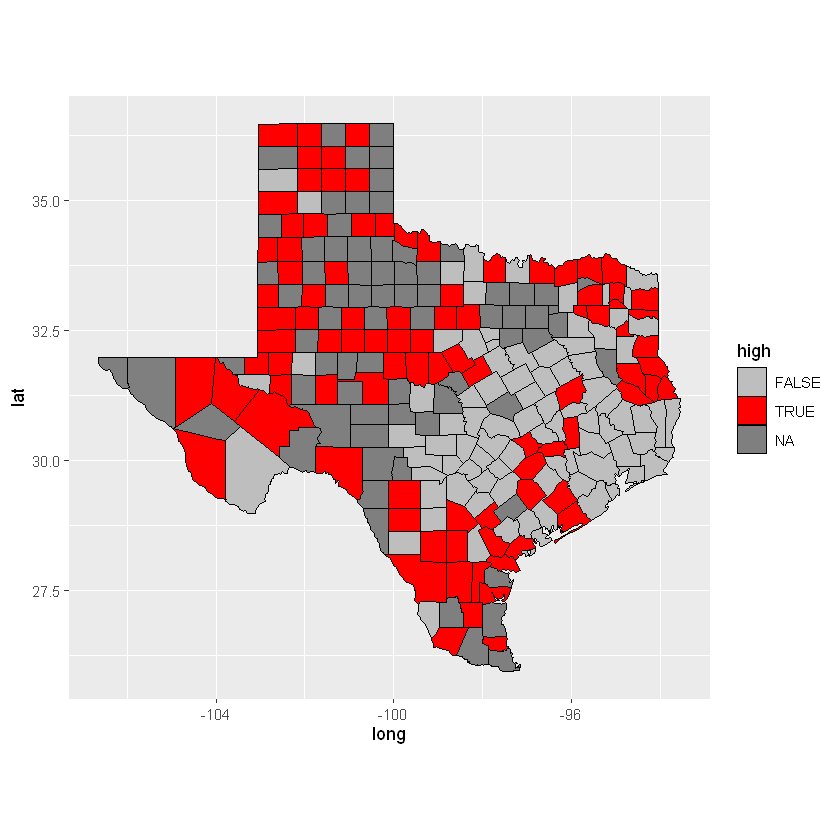

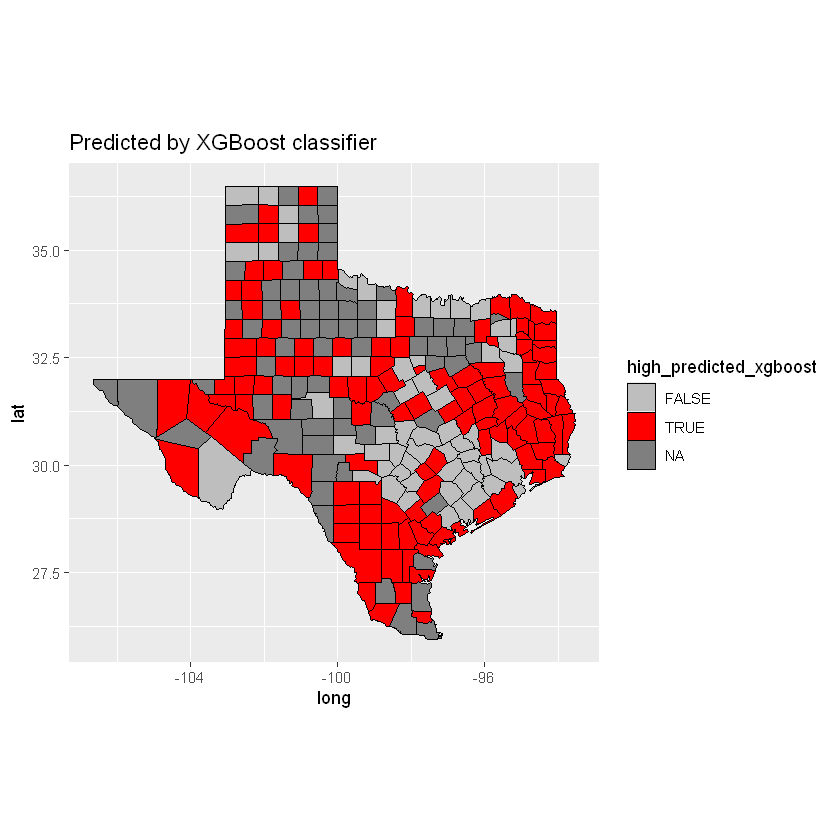

In [150]:
# Visualize the prediction results
counties_test <- texas_counties %>% left_join(dataset_test %>% 
    mutate(county = county_name %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

# Ground truth
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high), color = "black", size = 0.1) + 
  coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

# Predictions
predict_xgboost <- ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high_predicted_xgboost), color = "black", size = 0.1) + 
    coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))+ 
  ggtitle("Predicted by XGBoost classifier")

predict_xgboost

In [151]:
# Save the plot
ggsave("predict_xgboost.png", plot = predict_xgboost, width = 10, height = 10)

In [152]:
# Confusion Matrix
confusionMatrix(data = dataset_test$high_predicted_xgboost, ref = dataset_test$high)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE    38   22
     TRUE     50   71
                                          
               Accuracy : 0.6022          
                 95% CI : (0.5269, 0.6741)
    No Information Rate : 0.5138          
    P-Value [Acc > NIR] : 0.010369        
                                          
                  Kappa : 0.1969          
                                          
 Mcnemar's Test P-Value : 0.001463        
                                          
            Sensitivity : 0.4318          
            Specificity : 0.7634          
         Pos Pred Value : 0.6333          
         Neg Pred Value : 0.5868          
             Prevalence : 0.4862          
         Detection Rate : 0.2099          
   Detection Prevalence : 0.3315          
      Balanced Accuracy : 0.5976          
                                          
       'Positive' Class : FALSE           
                     

# Support Vector Machines

In [82]:
install.packages("kernlab")

package 'kernlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\yamph\AppData\Local\Temp\Rtmpo3USm3\downloaded_packages


In [83]:
library(kernlab)


Attaching package: 'kernlab'


The following object is masked from 'package:purrr':

    cross


The following object is masked from 'package:ggplot2':

    alpha




In [153]:
# Using 5 tuning parameter combinations, 10 folds CV.
svm <- dataset_train_for_model %>%
  train(high ~ .,
        method = "svmLinear",
        data = .,
        tuneLength = 5,
        trControl = trainControl(method = "cv"))
svm

Support Vector Machines with Linear Kernel 

23 samples
11 predictors
 2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 20, 21, 20, 21, 21, 21, ... 
Resampling results:

  Accuracy  Kappa
  0.75      0.45 

Tuning parameter 'C' was held constant at a value of 1

In [154]:
# Ranking of the features for predictions in the model
varImp(svm)

ROC curve variable importance

                                              Importance
commute                                           100.00
worked_at_home                                     97.96
income_50K_100K                                    89.80
hispanic_pop                                       85.71
black_pop                                          55.10
total_pop                                          53.06
workplaces_percent_change_from_baseline            32.65
transit_stations_percent_change_from_baseline      16.33
male_50_above                                      10.20
female_50_above                                    10.20
rent_over_50_percent                                0.00

## Accuracy & Evaluation

In [155]:
 # Use the model to predict on the test dataset. Add predicted values to column "high_predicted_xgboost_svm"
dataset_test$high_predicted_xgboost_svm <- predict(svm, dataset_test_for_model)

Joining with `by = join_by(county)`


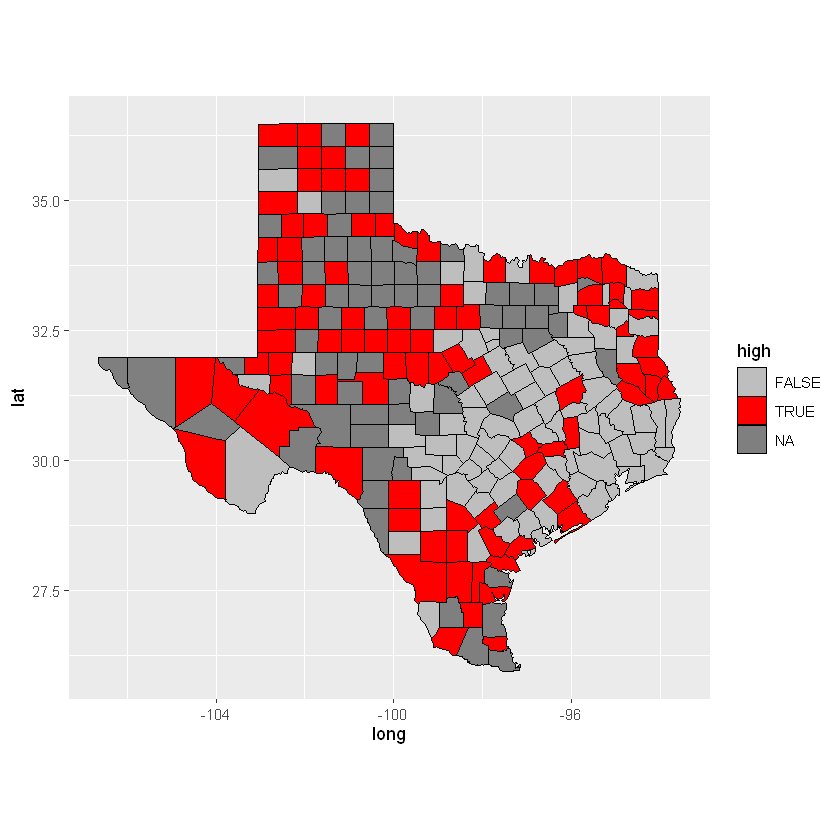

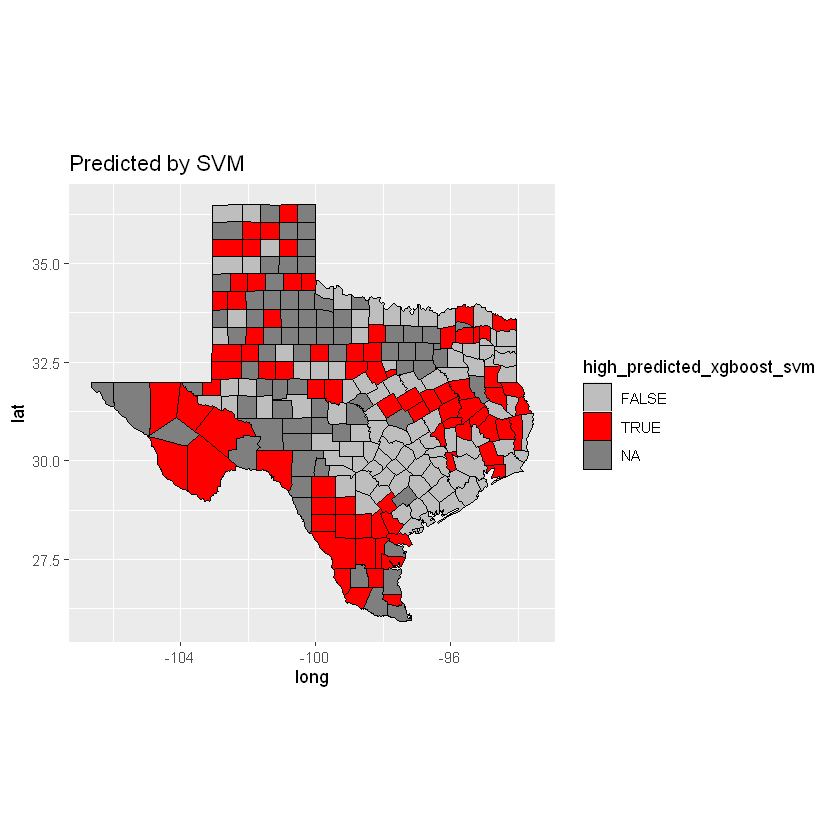

In [157]:
# Visualize the prediction results
counties_test <- texas_counties %>% left_join(dataset_test %>% 
    mutate(county = county_name %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

# Ground truth
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high), color = "black", size = 0.1) + 
  coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

# Predictions
predict_svm <- ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high_predicted_xgboost_svm), color = "black", size = 0.1) + 
    coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey')) + 
  ggtitle("Predicted by SVM")

predict_svm

In [158]:
# Save the plot
ggsave("predict_svm.png", plot = predict_svm, width = 10, height = 10)

In [159]:
# Confusion Matrix
confusionMatrix(data = dataset_test$high_predicted_xgboost_svm, ref = dataset_test$high)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE    57   42
     TRUE     31   51
                                          
               Accuracy : 0.5967          
                 95% CI : (0.5214, 0.6688)
    No Information Rate : 0.5138          
    P-Value [Acc > NIR] : 0.01529         
                                          
                  Kappa : 0.1955          
                                          
 Mcnemar's Test P-Value : 0.24184         
                                          
            Sensitivity : 0.6477          
            Specificity : 0.5484          
         Pos Pred Value : 0.5758          
         Neg Pred Value : 0.6220          
             Prevalence : 0.4862          
         Detection Rate : 0.3149          
   Detection Prevalence : 0.5470          
      Balanced Accuracy : 0.5981          
                                          
       'Positive' Class : FALSE           
                     

# Artificial Neural Network (ANN)


In [160]:
# Using 5 tuning parameter combinations, 10 folds CV.
nnet <- dataset_train_for_model %>%
  train(high ~ .,
        method = "nnet",
        data = .,
        tuneLength = 5,
        trControl = trainControl(method = "cv"),
       trace = FALSE)
nnet

Neural Network 

23 samples
11 predictors
 2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 21, 21, 21, 19, 21, 21, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa
  1     0e+00  0.4833333  0.00 
  1     1e-04  0.5166667  0.00 
  1     1e-03  0.5500000  0.10 
  1     1e-02  0.7166667  0.44 
  1     1e-01  0.7166667  0.40 
  3     0e+00  0.5166667  0.00 
  3     1e-04  0.5416667  0.05 
  3     1e-03  0.6916667  0.35 
  3     1e-02  0.6750000  0.35 
  3     1e-01  0.7500000  0.50 
  5     0e+00  0.5166667  0.00 
  5     1e-04  0.5083333  0.05 
  5     1e-03  0.7000000  0.40 
  5     1e-02  0.7250000  0.45 
  5     1e-01  0.8250000  0.65 
  7     0e+00  0.4833333  0.00 
  7     1e-04  0.6750000  0.35 
  7     1e-03  0.7250000  0.45 
  7     1e-02  0.5916667  0.19 
  7     1e-01  0.7500000  0.50 
  9     0e+00  0.5166667  0.00 
  9     1e-04  0.7250000  0.45 
  9     1e-03  0.7750000  0.55 
  9

In [161]:
# Ranking of the features for predictions in the model
varImp(nnet)

nnet variable importance

                                                Overall
total_pop                                     100.00000
transit_stations_percent_change_from_baseline  96.84173
workplaces_percent_change_from_baseline        43.91121
commute                                         4.45069
hispanic_pop                                    3.07584
female_50_above                                 0.98511
male_50_above                                   0.92064
income_50K_100K                                 0.57620
black_pop                                       0.38387
rent_over_50_percent                            0.05944
worked_at_home                                  0.00000

## Accuracy & Evaluation

In [128]:
 # Use the model to predict on the test dataset. Add predicted values to column "high_predicted_nnet"
dataset_test$high_predicted_nnet <- predict(nnet, dataset_test_for_model)

Joining with `by = join_by(county)`


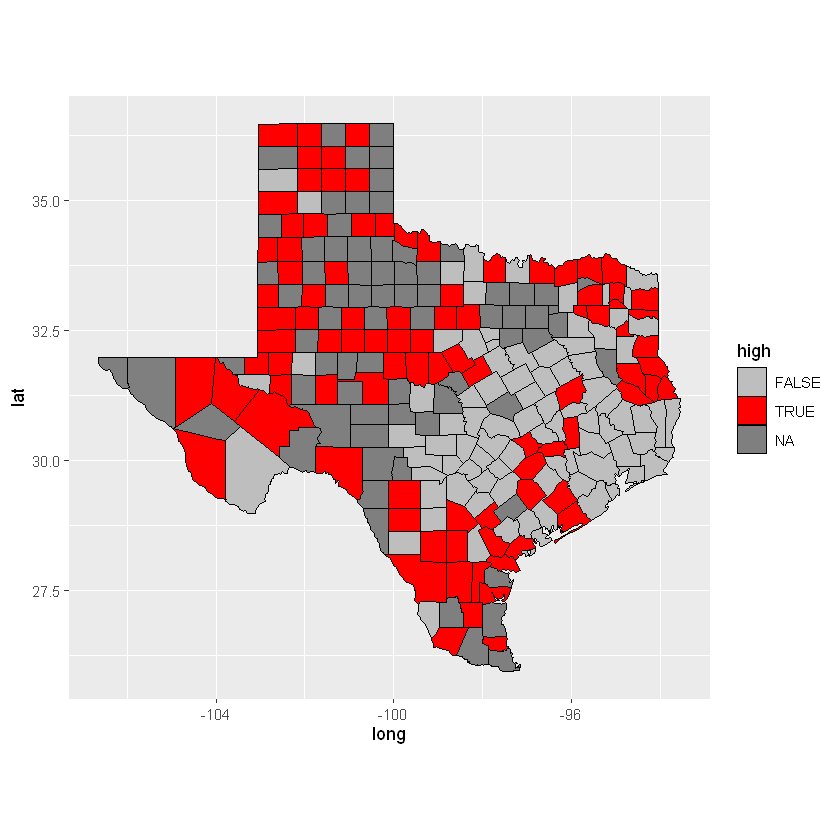

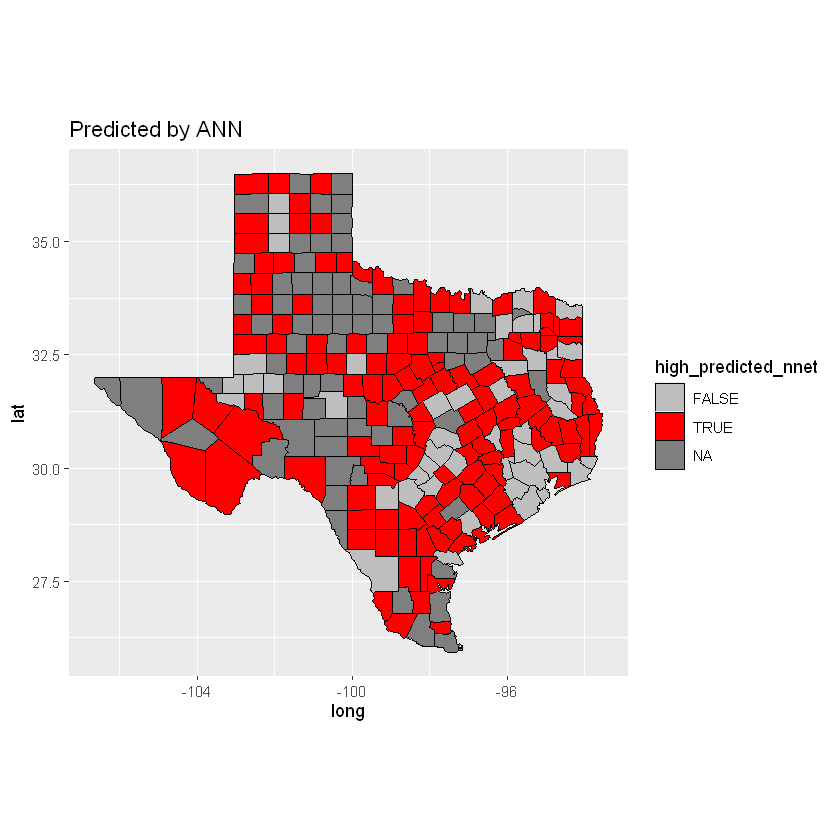

In [162]:
# Visualize the prediction results
counties_test <- texas_counties %>% left_join(dataset_test %>% 
    mutate(county = county_name %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

# Ground truth
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high), color = "black", size = 0.1) + 
  coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

# Predictions
predict_ANN <- ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = high_predicted_nnet), color = "black", size = 0.1) + 
    coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey')) +
  ggtitle("Predicted by ANN")

predict_ANN

In [163]:
# Save the plot
ggsave("predict_ANN.png", plot = predict_ANN, width = 10, height = 10)

In [164]:
# Confusion Matrix
confusionMatrix(data = dataset_test$high_predicted_nnet, ref = dataset_test$high)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE    32   15
     TRUE     56   78
                                          
               Accuracy : 0.6077          
                 95% CI : (0.5326, 0.6793)
    No Information Rate : 0.5138          
    P-Value [Acc > NIR] : 0.006888        
                                          
                  Kappa : 0.2049          
                                          
 Mcnemar's Test P-Value : 2.063e-06       
                                          
            Sensitivity : 0.3636          
            Specificity : 0.8387          
         Pos Pred Value : 0.6809          
         Neg Pred Value : 0.5821          
             Prevalence : 0.4862          
         Detection Rate : 0.1768          
   Detection Prevalence : 0.2597          
      Balanced Accuracy : 0.6012          
                                          
       'Positive' Class : FALSE           
                     

# Model Comparison

In [165]:
model_comparison <- resamples(list(
    kNearestNeighbors = knn_classifier,
    SVM = svm,
    RandomForest = random_forest_classifier,
    XGBoost = xgboost_classifier,
    ANN = nnet
    ))

summary(model_comparison)


Call:
summary.resamples(object = model_comparison)

Models: kNearestNeighbors, SVM, RandomForest, XGBoost, ANN 
Number of resamples: 10 

Accuracy 
                       Min. 1st Qu.    Median      Mean 3rd Qu. Max. NA's
kNearestNeighbors 0.5000000  0.7500 1.0000000 0.8833333       1    1    0
SVM               0.3333333  0.5000 0.8333333 0.7500000       1    1    0
RandomForest      0.5000000  0.6250 1.0000000 0.8500000       1    1    0
XGBoost           0.0000000  0.5625 1.0000000 0.7750000       1    1    0
ANN               0.5000000  0.5625 1.0000000 0.8250000       1    1    0

Kappa 
                  Min. 1st Qu. Median Mean 3rd Qu. Max. NA's
kNearestNeighbors  0.0   0.550    1.0 0.74       1    1    0
SVM               -0.5   0.000    0.5 0.45       1    1    0
RandomForest       0.0   0.250    1.0 0.70       1    1    0
XGBoost           -1.0   0.125    1.0 0.55       1    1    0
ANN                0.0   0.125    1.0 0.65       1    1    0


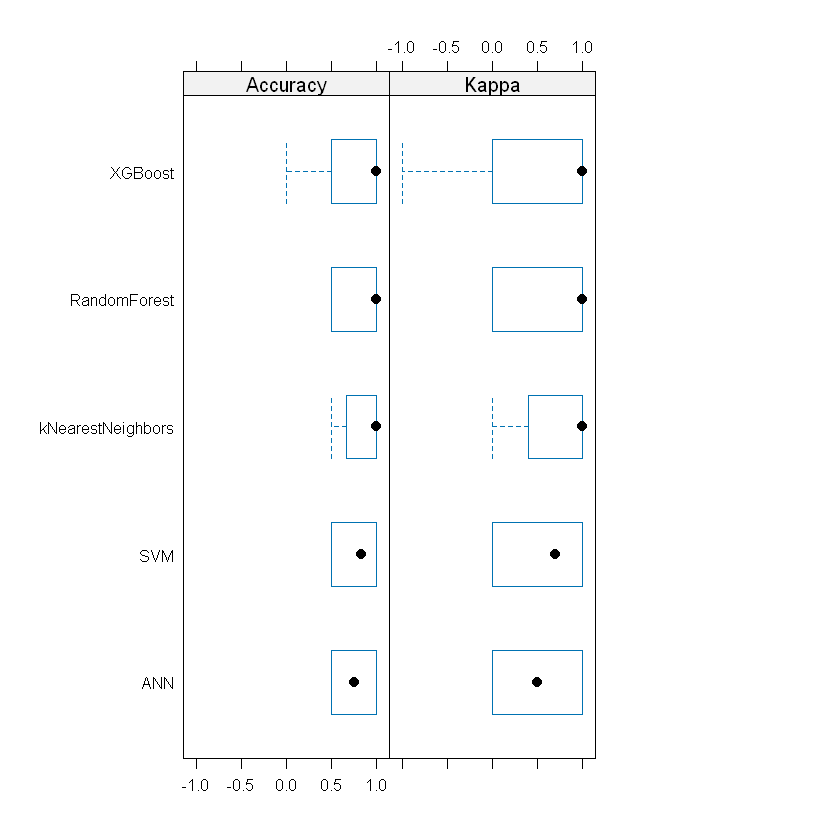

In [133]:
# Visualization of comparison based on accuracy and Kappa scores
bwplot(model_comparison, layout = c(3, 1))

In [134]:
# Difference in performance between consecutive classifiers
diff_model_comparison <- diff(model_comparison)

summary(diff_model_comparison)


Call:
summary.diff.resamples(object = diff_model_comparison)

p-value adjustment: bonferroni 
Upper diagonal: estimates of the difference
Lower diagonal: p-value for H0: difference = 0

Accuracy 
                  kNearestNeighbors SVM       RandomForest XGBoost   ANN      
kNearestNeighbors                    0.100000  0.033333     0.108333  0.133333
SVM               1                           -0.066667     0.008333  0.033333
RandomForest      1                 1                       0.075000  0.100000
XGBoost           1                 1         1                       0.025000
ANN               1                 1         1            1                  

Kappa 
                  kNearestNeighbors SVM   RandomForest XGBoost ANN  
kNearestNeighbors                    0.16  0.04         0.19    0.24
SVM               1                       -0.12         0.03    0.08
RandomForest      1                 1                   0.15    0.20
XGBoost           1                 1     1  